<a href="https://colab.research.google.com/github/Harshavardhan1005/Advance-Deep-Learning/blob/main/Applied_Deep_Learning_33046_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Applied Deep Learning Final Project on Bees:**

**Classification of Bees Using Tranfer learning in Deep Learning:**

In this Jupyter notebook classification of bees is done using transfer learning technique. It involves various steps starting from data collection, preprocessing the data, model selection and prediction. Keras frame work is used for this project as it provide user friendly commands to make task easier.
Transfer learning is opted instead of building model from scratch because it stores the knowledge gained while solving one problem and apply it to different but related problem.In case of CNN models for image recognition initial outer layers of deep learning model focus more on the higher level abstract features, top layers more on the details of the image. In this case it would make sense to reuse the outer layers trained on the abstract features.


**Imports**

Load all the necessary libraries for data retrieving, processing and visualizaton. 

In [1]:
# Import all the necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense,Flatten
from keras.applications.vgg19 import VGG19,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
from glob import glob

**Preparing Data**

The dataset is taken from kaggle [link](https://www.kaggle.com/jenny18/honey-bee-annotated-images), The dataset contails three folders for training, validating and testing. Each folder has four different categories of bees. Create the directory path for train, test and validate which can be used further in data augmentation. VGG accept the image size 224 X 224 X 3 so pass the images of this size to the model.




In [2]:
image_size = 224
batch_size = 64

train_dir = "/content/drive/MyDrive/bees/train/"
test_dir =  "/content/drive/MyDrive/bees/test/"
validate_dir = "/content/drive/MyDrive/bees/validate/"

**Load the pretrained VGG Model**

To classify different categories of the bees VGG model
pre-loaded with weights trained on ImageNet is used. By specifying the include_top=False argument, we load a network that doesn't include the classification layers, which is ideal for feature extraction. VGG layers are freezed and addition customize layers are added based on the requirement.

In [3]:
# Download VGG model
image_shape = (image_size, image_size, 3)
vgg = VGG19(input_shape=image_shape, weights='imagenet',include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [4]:
# Make all the layers as non trainable
for layer in vgg.layers:
  layer.trainable = False

In [5]:
# Glob used to find the nuromber of class labels
folders = glob(train_dir+"/*")

Additional layers are added as per the problem statement. For this task there are four different categories of bees so the final layer has 4 units and since it is multi classification problem Softmax activation function is used. The reasoning here is that the following fully-connected layers will be too specialized to the task the network was trained on, and thus the features learned by these layers won't be very useful for a new task. The bottle neck feature retain the generality.

In [6]:
# Designing own layers as per problem statement
x = Flatten()(vgg.output)
prediction = Dense(len(folders),activation = 'softmax')(x)

In [7]:
# Model Creation
model = Model(inputs=vgg.input,outputs=prediction)

In [8]:
# Summary of Model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Adam optimizer which is the replacement of stochastic gradient descent is used for training the deep learning models. ADAM combines the properties of ADAGRAD and RMSProp to provide best suited optimization algorithm for optimization.

In [9]:
# Compile model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

**Data Augmentation**

Here we are preprocessing the data in such a way that VGG netwrok accepts as input. The images need to have the shape of 224X224X3. Provided batch size si that weights updation is done after a bactch of images are processed and based on the loss. Keras provides ImageDataGenerator which simplies the task by simply passing the dataset to this function.

In [10]:
# Data Generator
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [11]:
# Training Set
train_generator = data_generator.flow_from_directory(train_dir,
                                                     target_size = (224,224),
                                                     batch_size = batch_size,
                                                     class_mode = 'categorical')

Found 4143 images belonging to 4 classes.


In [12]:
# Validation Set
valid_generator = data_generator.flow_from_directory(validate_dir,
                                                     target_size = (224,224),
                                                     batch_size = batch_size,
                                                     class_mode = 'categorical')

Found 500 images belonging to 4 classes.


In [13]:
# Test Set
test_generator = data_generator.flow_from_directory(test_dir,
                                                    target_size = (224,224),
                                                    batch_size = batch_size,
                                                    shuffle = False,
                                                    class_mode = 'categorical')

Found 500 images belonging to 4 classes.


**Model Training**

Once thae data is seperated for training and validation using ImageDataGenerator and model is ready for training, pass the training set to model.fit with certain number of epochs. Usually it takes more time because of more training parameters.

In [14]:
# Fit the model
epochs = 5
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

history = model.fit(train_generator,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=validation_steps)

Epoch 1/5
64/64 [==============================] - 4145s 65s/step - loss: 2.8034 - accuracy: 0.7866 - val_loss: 0.2732 - val_accuracy: 0.9598
Epoch 2/5
64/64 [==============================] - 39s 613ms/step - loss: 0.1205 - accuracy: 0.9831 - val_loss: 0.1349 - val_accuracy: 0.9799
Epoch 3/5
64/64 [==============================] - 39s 613ms/step - loss: 0.0268 - accuracy: 0.9961 - val_loss: 0.1299 - val_accuracy: 0.9821
Epoch 4/5
64/64 [==============================] - 39s 611ms/step - loss: 0.0123 - accuracy: 0.9961 - val_loss: 0.0834 - val_accuracy: 0.9866
Epoch 5/5
64/64 [==============================] - 39s 611ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0855 - val_accuracy: 0.9866


**Visualization of loss**

From the graph below it is clear that loss decreases as the number of epochs increased and the accuracy keeps on increasing which states the model is training good and it is best suited for prediction on the test data.

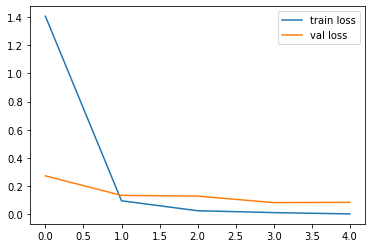

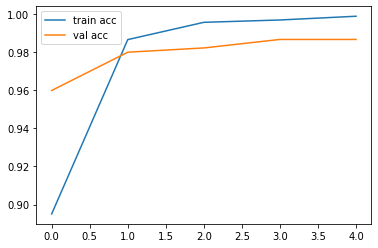

In [17]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [18]:
# save the model
model.save('/content/drive/MyDrive/bees_classification.h5')

**Predictions**

To provide independent evaluation of the trained model. Test dataset of unseen data is taken for evaluation it contains all the four categories of the bees. Various evaluation metrics like Accuracy score, F1 Score and classification report is found to determine the performance of the model.

In [19]:
# Prediction
pred = model.predict(test_generator)
pred = np.argmax(pred,axis=1)

In [20]:
# Accuracy Score
print(accuracy_score(pred,test_generator.labels))

0.986


In [21]:
# Confusion Matrix
print(confusion_matrix(test_generator.labels,pred))

[[ 30   1   1   0]
 [  0 315   1   0]
 [  0   3 102   0]
 [  0   1   0  46]]


In [22]:
# Classification Report
print(classification_report(test_generator.labels,pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.98      1.00      0.99       316
           2       0.98      0.97      0.98       105
           3       1.00      0.98      0.99        47

    accuracy                           0.99       500
   macro avg       0.99      0.97      0.98       500
weighted avg       0.99      0.99      0.99       500



**Conclusion:**

It is very clear that pre-trained model for image classification and reused its base to “extract features” is relevant to solving a Bees classification problem.
The accuracy value, precision and recall are very good it can be used straight away for classification pupose. Further to proceed with this project i am interested in tracking the bee by using some detection algorithms using YOLOV4 algorithm.


In addition i also tried training the model using YOLOV4 frame work but due to lack of proper GPU it is taking weeks to train the model for getting some decent accuracy. So i had used a prerained model of bees which is trained for more than 400 thousands of bee images. I will take this as my extension of project to work with YOLOV4 and latest YOLOV5. Initially i learnt about YOLOV3 but its accuracy falls down if the images size is less so it would be right choice to use YOLOV4 which solves the problem. YOLOV4 is used to create a model that detect the bees, which is fast and accurate object detection framework. 

In [11]:
!git clone https://github.com/AlexeyAB/darknet/
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/g' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/g' Makefile
!apt update
!apt-get install libopencv-dev python-opencv
!make clean
!make

Cloning into 'darknet'...
remote: Enumerating objects: 14691, done.
remote: Total 14691 (delta 0), reused 0 (delta 0), pack-reused 14691
Receiving objects: 100% (14691/14691), 13.25 MiB | 7.02 MiB/s, done.
Resolving deltas: 100% (9994/9994), done.
Checking out files: 100% (2023/2023), done.
/content/gdrive/My Drive/darknet
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://archive.ubuntu.com/ubuntu 

In [18]:
Video_Location = 'T1_5L_1_cut1.mp4' #@param {type:"string"}
Output_Location = 't15l1_pred_1440.mp4' #@param {type:"string"}

absl_in = "/content/gdrive/My\ Drive/"+Video_Location
absl_out = "/content/gdrive/My\ Drive/"+Output_Location

In [19]:
!python3 predict_no_overlap.py --input $absl_in --weights weights/yolov4-bees_final.weights --config_file weights/yolov4-bees.cfg --data_file data/obj.data --thresh 0.55 --out_filename $absl_out --filter True

 Try to load cfg: weights/yolov4-bees.cfg, weights: weights/yolov4-bees_final.weights, clear = 0 
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1   1280 x1280 x   3 -> 1280 x1280 x  32 2.831 BF
   1 conv     64       3 x 3/ 2   1280 x1280 x  32 ->  640 x 640 x  64 15.099 BF
   2 conv     64       1 x 1/ 1    640 x 640 x  64 ->  640 x 640 x  64 3.355 BF
   3 route  1 		                           ->  640 x 640 x  64 
   4 conv     64       1 x 1/ 1    640 x 640 x  64 ->  640 x 640 x  64 3.355 BF
   5 conv     32       1 x 1/ 1    640 x 640 x  64 ->  640 x 640 x  32 1.678 BF
   6 conv     64       3 x 3/ 1    640 x 640 x  32 ->  640 x 640 x  64 15.099 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 640 x 640 x  64 0.026 BF
   8 conv     64       1 x 1/ 1    640 x 640 x  64 ->  640 x 640 x  64